<a href="https://colab.research.google.com/github/Vinzzztty/car_price_prediction_FP_bigData/blob/main/CarPrice_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Harga Mobil dengan Linear Regression

Latar Belakang Dataset: Geely Auto, sebuah perusahaan otomotif China, berencana memasuki pasar Amerika Serikat dengan mendirikan pabrik manufaktur dan memproduksi mobil secara lokal untuk bersaing dengan pesaing AS dan Eropa.
<br>
Perusahaan tersebut ingin mengetahui:
1.   Variabel mana yang memiliki pengaruh signifikan dalam memprediksi harga mobil.
2.   Seberapa baik variabel-variabel tersebut menjelaskan harga mobil.
<br>

Tujuan: Apakah model Linear Regression dapat digunakan untuk memprediksi harga mobil di Pasar AS.



# Load Dataset

In [95]:
# Cloning data
!git clone https://github.com/Vinzzztty/car_price_prediction_FP_bigData.git

Cloning into 'car_price_prediction_FP_bigData'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 22 (delta 5), reused 16 (delta 1), pack-reused 0
Receiving objects: 100% (22/22), 71.61 KiB | 7.16 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [96]:
!ls

CarPrice_Assignment.csv  car_price_prediction_FP_bigData


In [97]:
# Pindah ke folder car_price_prediction_FP_bigData
%cd car_price_prediction_FP_bigData/

!ls

/content/car_price_prediction_FP_bigData/Dataset/car_price_prediction_FP_bigData
CarPrice_Prediction_using_Linear_Regression.ipynb  Dataset


In [98]:
# Pindah ke folder Dataset
%cd Dataset/

/content/car_price_prediction_FP_bigData/Dataset/car_price_prediction_FP_bigData/Dataset


In [99]:
!ls

CarPrice_Assignment.csv


# Import Library

In [100]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

# Describe Data

In [101]:
data_cars = pd.read_csv('CarPrice_Assignment.csv')
data_cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [102]:
data_cars.shape

(205, 26)

In [103]:
data_cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [104]:
data_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data Preparation

In [105]:
# Split companyName dari kolom CarName
CompanyName = data_cars['CarName'].apply(lambda x : x.split(' ')[0])
data_cars.insert(3, "CompanyName", CompanyName)
data_cars.drop(['CarName'], axis=1, inplace=True)
data_cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [106]:
data_cars['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [107]:
# Perbaiki nilai yang mirip atau salah seperti maxda dengan mazda, Nissan dengan nissan,
# porsche dengan porcshe, toyota dengan toyouta, vokswagen dengan wolkswagen dan vw

data_cars['CompanyName'] = data_cars['CompanyName'].str.lower()

def replace_name(old_name, new_name):
  data_cars['CompanyName'].replace(old_name, new_name, inplace = True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

data_cars['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Data Cleaning

In [108]:
# Cek data duplicate
data_cars.loc[data_cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [109]:
# Cek data kosong
data_cars.isnull().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [110]:
data_cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Data Visualize

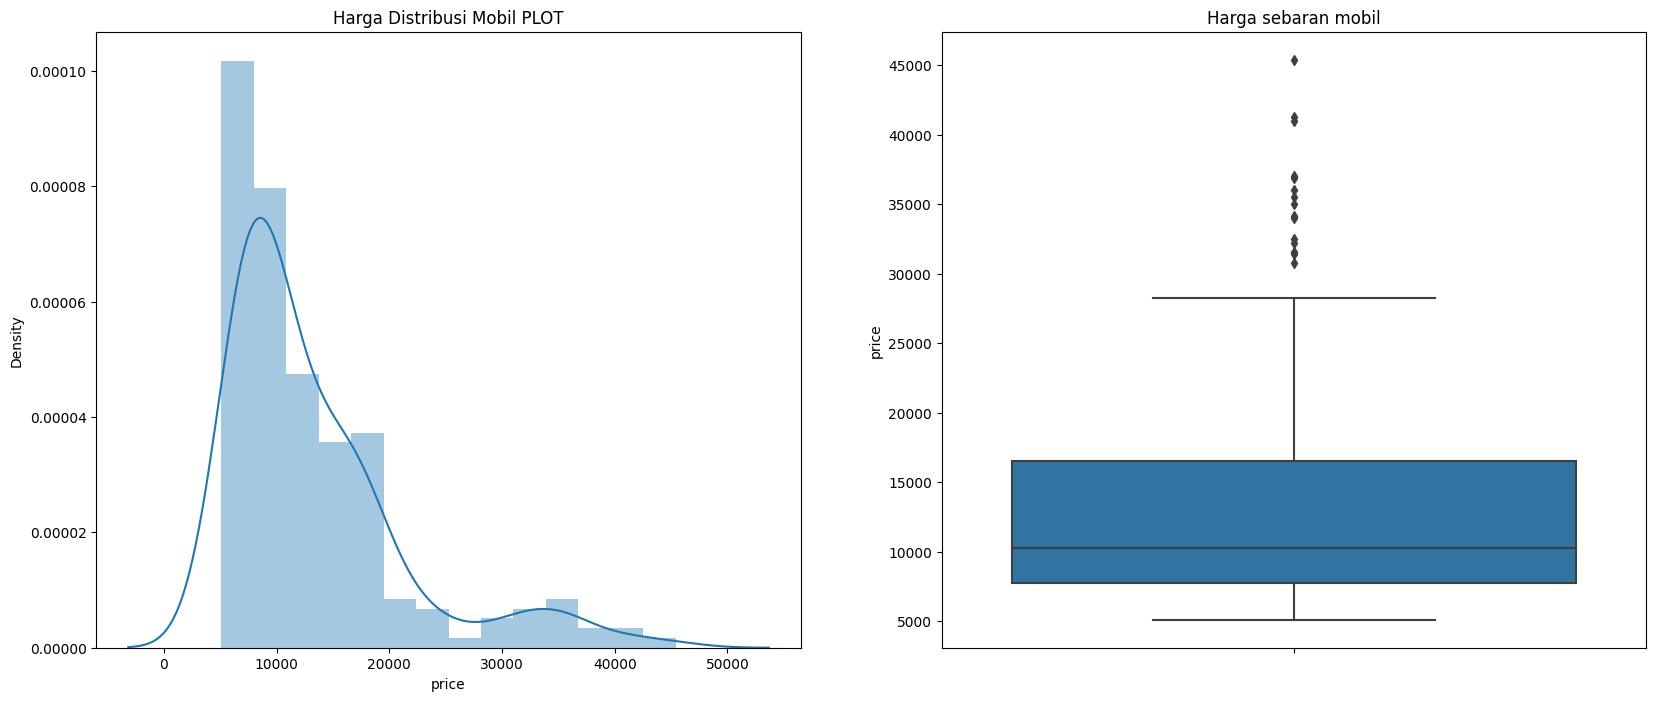

In [111]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.title('Harga Distribusi Mobil PLOT')
sns.distplot(data_cars['price'])

plt.subplot(1, 2, 2)
plt.title('Harga sebaran mobil')
sns.boxplot(y=data_cars['price'])

plt.show()

In [112]:
deskripsi_harga = data_cars['price'].describe(percentiles = [0.25, 0.50, 0.75, 0.85, 0.90, 1])
print(deskripsi_harga)

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


### Interface

1.   Harga varian mobil tinggi(85% harga dibawah 18.500, sedangkan 15% sisanya diantara 18.500 dan 45.400)



# Correlation

In [113]:
# Make new features
# Fuel Economy
data_cars['fueleconomy'] = (0.55 * data_cars['citympg']) + (0.45 * data_cars['highwaympg'])

In [114]:
# Membuat kategori Car Companies berdasarkan rata rata harga dari Company
data_cars['price'] = data_cars['price'].astype('int')
temp = data_cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
data_cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
data_cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


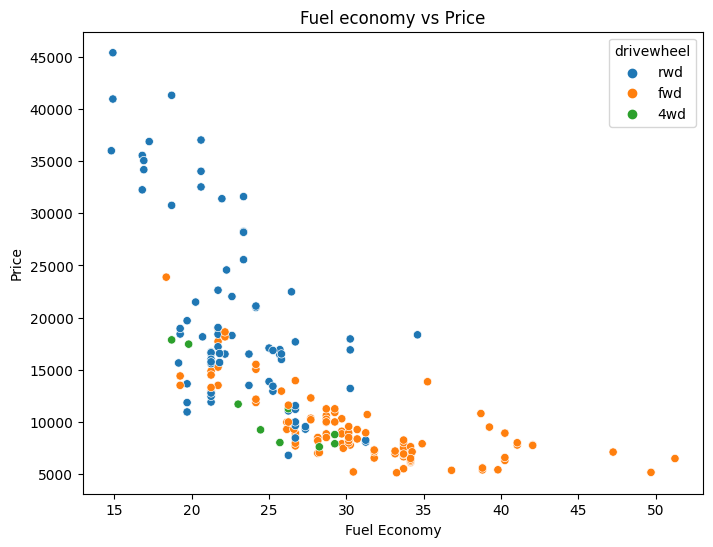

<Figure size 640x480 with 0 Axes>

In [115]:
# Analisis Bivariate
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=data_cars['fueleconomy'],y=data_cars['price'],hue=data_cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

In [116]:
print("Hasil korelasi: ", np.corrcoef(data_cars['carlength'], data_cars['carwidth'])[0, 1])

Hasil korelasi:  0.841118268481846


### List fix variables

In [117]:
cars_lr = data_cars[['price', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'carlength', 'carwidth']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


In [118]:
# Map function
def dummies(x, df):
  temp = pd.get_dummies(df[x], drop_first=True)
  df = pd.concat([df, temp], axis = 1)
  df.drop([x], axis = 1, inplace = True)
  return df

# masukkan ke cars_lr
cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)

In [119]:
cars_lr.shape

(205, 28)

# Make a Model

## Train-Test Split and Feature Scaling

In [120]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size=0.7, test_size=0.3, random_state=100)

In [121]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'carlength', 'carwidth', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [122]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.426016,0.291667,1,0,...,1,0,0,0,0,1,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.452033,0.666667,1,0,...,1,0,0,0,0,1,0,0,0,0
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.448780,0.308333,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.450407,0.316667,1,0,...,0,0,0,0,0,1,0,0,0,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.775610,0.575000,1,1,...,1,0,0,0,0,1,0,0,0,0


In [123]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.525476,0.461655,0.909091,0.181818,...,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.204848,0.184517,0.288490,0.387050,...,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.399187,0.304167,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.502439,0.425000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.669919,0.550000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation dengan Heatmap

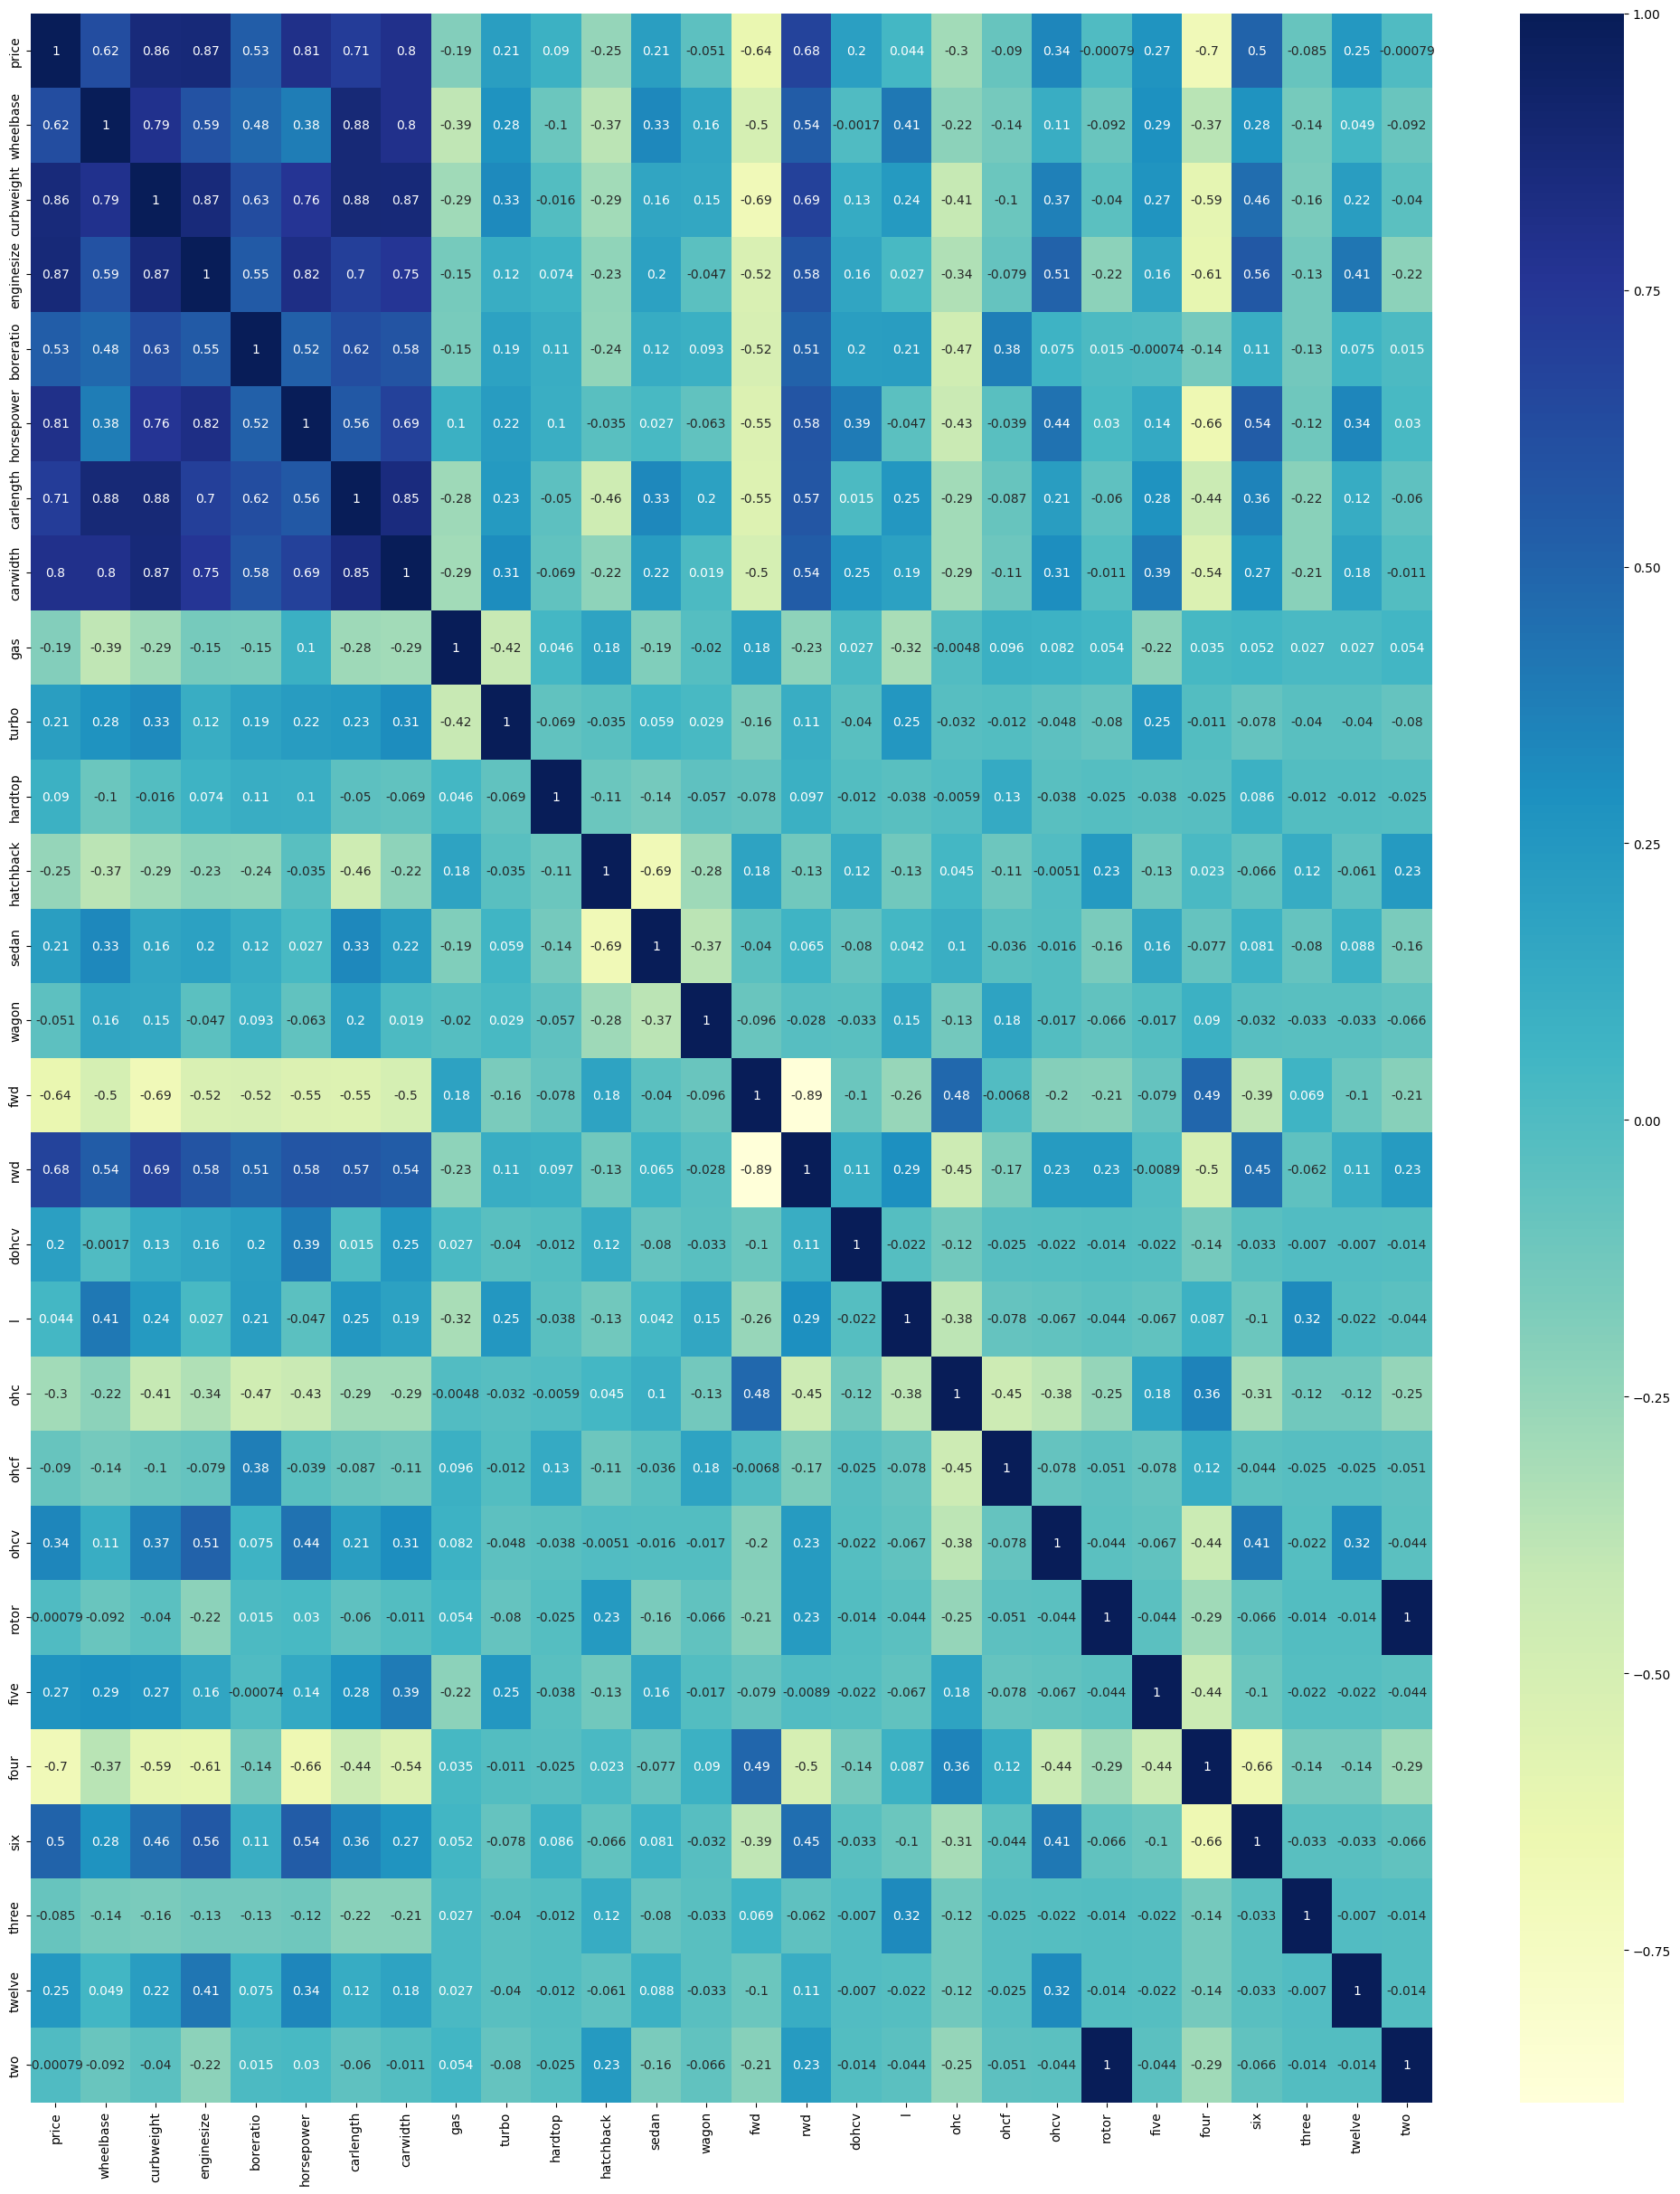

In [124]:
plt.figure(figsize = (25, 30))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [125]:
y_train = df_train.pop('price')
X_train = df_train

## Membuat Model

In [126]:
# RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

In [170]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
rfe = RFE(lm, step=10)
rfe = rfe.fit(X_train, y_train)

In [128]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 3),
 ('horsepower', True, 1),
 ('carlength', True, 1),
 ('carwidth', False, 2),
 ('gas', False, 3),
 ('turbo', False, 3),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 3),
 ('rwd', False, 3),
 ('dohcv', True, 1),
 ('l', False, 3),
 ('ohc', False, 2),
 ('ohcf', False, 2),
 ('ohcv', False, 3),
 ('rotor', False, 3),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 3),
 ('twelve', True, 1),
 ('two', False, 3)]

In [129]:
X_train.columns[rfe.support_]

Index(['wheelbase', 'curbweight', 'enginesize', 'horsepower', 'carlength',
       'hatchback', 'sedan', 'wagon', 'dohcv', 'five', 'four', 'six',
       'twelve'],
      dtype='object')

**Membuat model dengan statsmodel diatas**

In [130]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,wheelbase,curbweight,enginesize,horsepower,carlength,hatchback,sedan,wagon,dohcv,five,four,six,twelve
122,0.244828,0.272692,0.139623,0.083333,0.426016,0,1,0,0,0,1,0,0
125,0.272414,0.500388,0.339623,0.395833,0.452033,1,0,0,0,0,1,0,0
166,0.272414,0.314973,0.139623,0.266667,0.448780,1,0,0,0,0,1,0,0
1,0.068966,0.411171,0.260377,0.262500,0.450407,0,0,0,0,0,1,0,0
199,0.610345,0.647401,0.260377,0.475000,0.775610,0,0,1,0,0,1,0,0


**Membuat Fungsi**

In [131]:
def build_model(X, y):
  X = sm.add_constant(X) # Nilai constant
  lm = sm.OLS(y, X).fit() # fitting model
  print(lm.summary()) # Model summary
  return X

def checkVIF(X):
  vif = pd.DataFrame()
  vif['Features'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return(vif)


**Model 1**

In [137]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     65.41
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           3.12e-50
Time:                        06:45:48   Log-Likelihood:                 161.89
No. Observations:                 143   AIC:                            -295.8
Df Residuals:                     129   BIC:                            -254.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1329      0.052      2.555      0.0

**Model 2**

In [139]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     65.41
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           3.12e-50
Time:                        06:46:46   Log-Likelihood:                 161.89
No. Observations:                 143   AIC:                            -295.8
Df Residuals:                     129   BIC:                            -254.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1329      0.052      2.555      0.0

In [140]:
# Menghitung VIF (Variance Inflation Factor)
checkVIF(X_train_new)

,Features,VIF
0,const,57.34
2,curbweight,16.26
5,carlength,9.44
3,enginesize,9.28
7,sedan,8.02
4,horsepower,7.04
1,wheelbase,6.82
6,hatchback,6.71
11,four,4.90
12,six,4.84


In [142]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

**Model 3**

In [143]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     69.76
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.33e-50
Time:                        06:47:44   Log-Likelihood:                 160.43
No. Observations:                 143   AIC:                            -294.9
Df Residuals:                     130   BIC:                            -256.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1408      0.052      2.703      0.0

In [144]:
checkVIF(X_train_new)

,Features,VIF
0,const,56.83
4,carlength,8.29
6,sedan,7.85
5,hatchback,6.67
2,enginesize,6.65
3,horsepower,6.00
1,wheelbase,5.80
10,four,4.66
7,wagon,4.63
11,six,4.46


In [146]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

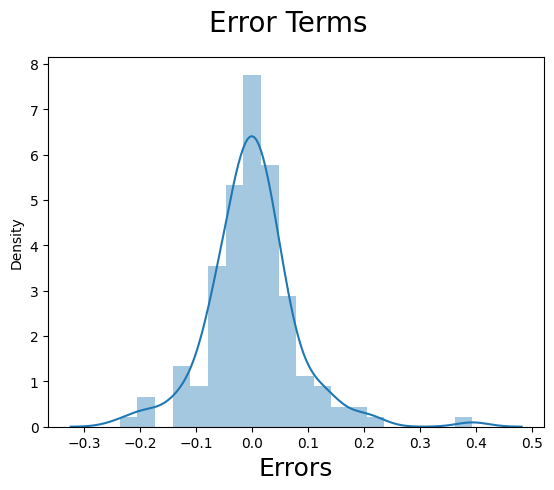

In [147]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

# Prediction

In [148]:
# Scaling test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'carlength', 'carwidth', 'price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [149]:
y_test = df_test.pop('price')
X_test = df_test

In [150]:
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)

In [151]:
# Membuat prediksi
y_pred = lm.predict(X_test_new)

# Evaluation

In [152]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6781712634195791

Text(0, 0.5, 'y_pred')

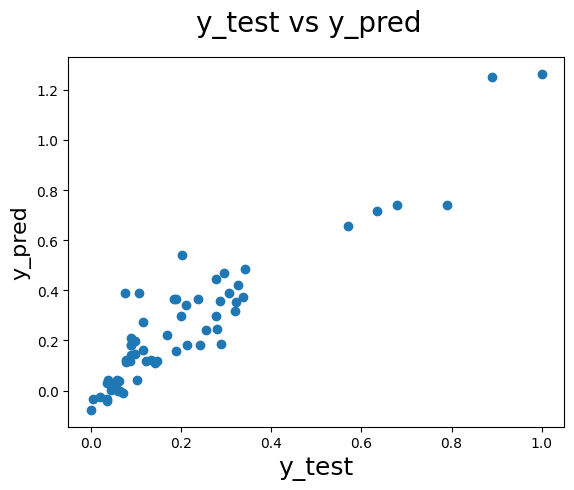

In [153]:
#EVALUATION OF THE MODEL
# Untuk mengevaluasi model, kita dapat membuat plot antara nilai y_test (nilai aktual) dan y_pred (nilai yang diprediksi oleh model) untuk memahami persebaran datanya.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [175]:
model = LinearRegression().fit(X_train, y_train)

In [176]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('Mean Absolute Error : %.2f' % mean_absolute_error(y_pred, y_test)) # syntax disamping akan menampilkan hasil hitungan MAE dari model dengan parameter y data test dan y data prediksi
print('Mean Squared Error : %.2f' % mean_squared_error(y_pred, y_test)) # syntax disamping akan menampilkan hasil hitungan MSE dari model dengan parameter y data test dan y data prediksi

# evaluasi dengan RMSE ()
Y_test_pred = model.predict(X_test) # syntax ini akan melakukan uji model dengan data test dari variable X
rmse_test = (np.sqrt(mean_squared_error(y_test, Y_test_pred)))  # syntax ini akan menghitung RMSE dari data test dan dari hasil uji model
print("RMSE : ", rmse_test) # ini akan menampilkan hasil RMSE

Mean Absolute Error : 0.09
Mean Squared Error : 0.01
RMSE :  0.12819898145173242


# Sumarry

In [154]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     69.76
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.33e-50
Time:                        06:51:59   Log-Likelihood:                 160.43
No. Observations:                 143   AIC:                            -294.9
Df Residuals:                     130   BIC:                            -256.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1408      0.052      2.703      0.0

**Hasil evaluasi R-squared (R2**) menunjukkan nilai sebesar 0.6781 sekian. R2 adalah metrik evaluasi yang memberikan gambaran tentang seberapa baik model regresi kita cocok dengan data aktual. Ada sekitar 32.19% variasi yang tidak dijelaskan oleh model
<br>
<br>
**Hasil evaluasi** menunjukkan bahwa model regresi yang digunakan telah memberikan performa yang baik dalam memprediksi harga mobil di pasar Amerika Serikat. Semakin mendekati nol nilai MAE, MSE, dan RMSE, semakin baik model tersebut dalam menghasilkan prediksi yang akurat.